In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




pd.set_option('display.max_columns', 500)

In [2]:
#This is with data from the Libraries.io website
#very much hacked together but just to see if it works ;)

path ="/home/rick/UH-Spring-2019/Project/codescoop-models/Libraries_io_data/"


dependencies =          path + "Libraries.io-open-data-1.0.1/dependencies-1.0.0-2017-06-15.csv"
projects =              path + "Libraries.io-open-data-1.0.1/projects-1.0.0-2017-06-15.csv"
projects_w_repository = path + "Libraries.io-open-data-1.0.1/projects_with_repository_fields-1.0.0-2017-06-15.csv"
repos =                 path + "repositories-1.2.0-2018-03-12.csv"
repos_depend =          path + "repository_dependencies-1.2.0-2018-03-12.csv"
tags =                  path + "Libraries.io-open-data-1.0.1/tags-1.0.0-2017-06-15.csv"

In [6]:
data = pd.read_csv(repos, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38], 
                   nrows = 100000)
data.tail()

/home/rick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Host Type,Name with Owner,Description,Fork,Created Timestamp,Updated Timestamp,Last pushed Timestamp,Homepage URL,Size,Stars Count,Language,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Mirror URL,Open Issues Count,Default branch,Watchers Count,UUID,Fork Source Name with Owner,License,Contributors Count,Readme filename,Changelog filename,Contributing guidelines filename,License filename,Code of Conduct filename,Security Threat Model filename,Security Audit filename,Status,Last Synced Timestamp,SourceRank,Display Name,SCM type,Pull requests enabled,Logo URL,Keywords
107593,GitHub,maximgladkov/hubot-whosonstaging,Script integrates hubot with Who's on Staging?...,False,2014-11-16 11:20:35 UTC,2018-02-25 12:37:50 UTC,2014-11-17 21:09:11 UTC,NaN,124,1,CoffeeScript,True,True,False,0,NaN,0,master,1,26711909,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25 12:37:49 UTC,1,GitHub,NaN,git,NaN,NaN
107594,GitHub,tmitz/hubot-witty,NaN,False,2014-11-17 04:56:16 UTC,2017-01-26 00:13:12 UTC,2015-10-30 05:19:11 UTC,NaN,118,0,CoffeeScript,True,True,False,1,NaN,0,master,1,26740695,NaN,MIT,1,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-04-27 19:42:44 UTC,2,GitHub,NaN,NaN,NaN,NaN
107595,GitHub,lbalceda/hubot-woah,woah thats a low price,False,2015-01-17 02:18:49 UTC,2018-02-25 12:38:34 UTC,2015-01-17 02:45:35 UTC,NaN,132,0,CoffeeScript,True,True,False,0,NaN,0,master,1,29376872,NaN,MIT,1,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2018-02-25 12:38:33 UTC,2,GitHub,NaN,git,NaN,NaN
107596,GitHub,rdodev/hubot-wiki,A small Hubot script to search and display lin...,False,2013-12-12 17:28:42 UTC,2016-12-28 21:25:26 UTC,2013-12-12 18:10:25 UTC,NaN,120,0,CoffeeScript,True,True,False,0,NaN,0,master,0,15142642,NaN,MIT,1,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-04-29 22:02:30 UTC,3,GitHub,NaN,NaN,NaN,NaN
107597,GitHub,notpeter/hubot-wolfram,Hubot script to query wolfram alpha,False,2014-10-25 02:05:35 UTC,2017-12-01 00:32:15 UTC,2016-08-29 17:40:17 UTC,NaN,6,9,CoffeeScript,True,True,False,13,NaN,2,master,1,25716628,NaN,MIT,2,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-08-29 17:44:12 UTC,5,GitHub,NaN,git,NaN,NaN


In [7]:
def gnumeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

In [83]:
#getting the explanatory variables, and changing categorial values to dummies
droplist = ['SourceRank','Description', 'Name with Owner', 'Created Timestamp', "Updated Timestamp", 'Last pushed Timestamp', 'Homepage URL', 'Mirror URL', 'UUID', 'Last Synced Timestamp','Fork Source Name with Owner', 'Changelog filename', 'Contributing guidelines filename', 'License filename','Code of Conduct filename', 'Security Threat Model filename', 'Security Audit filename', 'SCM type', 'Logo URL', 'Keywords', 'Stars Count' ]
factorizelist = ['Host Type', 'Fork', 'Language', 'Issues enabled', 'Wiki enabled', 'Pages enabled', 'License', 'Readme filename', 'Default branch', 'Status', 'Display Name', 'Pull requests enabled'] 
datax = data.drop(droplist, axis=1 )

datax = gnumeric_func(datax, factorizelist)
datax

,Host Type,Fork,Size,Language,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Open Issues Count,Default branch,Watchers Count,License,Contributors Count,Readme filename,Status,Display Name,Pull requests enabled
1,0,0,512,0,0,0,0,0,1,0,2,0,1,0,-1,0,-1
2,0,0,924,0,0,0,1,782,85,0,61,0,21,0,-1,0,0
3,0,1,472,0,1,0,1,0,0,0,1,-1,5,0,-1,0,-1
4,0,0,536,0,0,0,0,1,2,0,1,-1,1,0,-1,0,-1
5,0,0,192,1,0,0,1,0,0,0,2,0,1,0,-1,0,-1
6,0,0,285,1,0,0,1,3,3,0,4,0,1,0,-1,0,0
7,0,0,771,0,0,1,0,0,0,0,13,0,1,0,-1,0,0
8,0,0,108,0,1,1,1,0,0,0,1,-1,0,-1,-1,0,-1
9,0,0,907,0,0,0,1,495,15,0,184,0,74,0,-1,0,0
10,0,0,120,0,0,0,1,0,0,0,2,-1,1,-1,-1,0,0


alpha =  0.0001
Training score: 0.8386077309102041
Test score:  0.8719529102447445
Number of features used:  17
 
alpha =  0.001
Training score: 0.8386077302564008
Test score:  0.8719531337912185
Number of features used:  17
 
alpha =  0.01
Training score: 0.8386076648760484
Test score:  0.8719553402965963
Number of features used:  16
 
alpha =  0.05
Training score: 0.8386060798987629
Test score:  0.8719644146511037
Number of features used:  16
 
alpha =  0.1
Training score: 0.8386029391581257
Test score:  0.8719754162290634
Number of features used:  15
 
alpha =  1
Training score: 0.8385121648410755
Test score:  0.8720937298168294
Number of features used:  13
 
alpha =  5
Training score: 0.838120185028685
Test score:  0.872222360719264
Number of features used:  10
 
alpha =  10
Training score: 0.8378271335288797
Test score:  0.8720581730024584
Number of features used:  9
 
Optimal alpha =  5


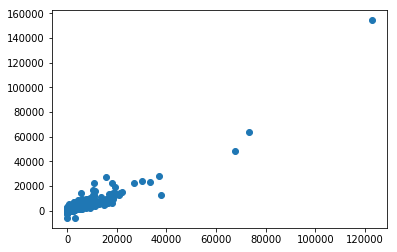

Mean squared error:  236534.79186017817
Model R² score:  0.872222360719264


In [100]:
# This code demonstrates how to use lasso regression for choosing optimal variables
# for a linear model.

# x should be a dataframe containing the explanatory variables (forks, language, etc)
x = datax

# y should be a vector containing the target variable (number of stars)
y = list(data["Stars Count"])

# split the data in to train and test part
X_train, X_test, y_train, y_test = train_test_split(x, y)


## trying different alphas and choosing the optimal model

# if fitting of the model is really slow, you can drop last values of alpha to make it faster
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5, 10]
n = len(alphas)
test_scores = np.zeros(n)

for i in range(0,n):
    a = alphas[i]
    print("alpha = ", a)
    lasso = Lasso(alpha = a, max_iter = 10e5)
    lasso.fit(X_train, y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    test_scores[i] = test_score
    coeff_used = np.sum(lasso.coef_!=0)
    print("Training score:", train_score)
    print("Test score: ", test_score)
    print("Number of features used: ", coeff_used)
    print(" ")

# pick the alpha value with best score
best_alpha = alphas[np.argmax(test_scores)]
print("Optimal alpha = ", best_alpha)
lasso = Lasso(alpha = best_alpha, max_iter = 10e5)
lasso.fit(X_train, y_train)

# create a df with the coefficents of the features
df_coef = pd.DataFrame({'Features':x.columns,'coeff': lasso.coef_})
df_coef = df_coef.sort_values(by = ['coeff'])
df_intercept = pd.DataFrame({'Features':['Intercept'], 'coeff':lasso.intercept_} )
df_coef = df_coef.append(df_intercept)
df_coef = df_coef[df_coef.coeff != -0.0]


# model summary
predicted = lasso.predict(X_test)
expected = y_test
# expected vs predicted values
plt.scatter(expected, predicted)
plt.show()
print("Mean squared error: ", mean_squared_error(expected, predicted))
print("Model R² score: ", r2_score(expected, predicted))

In [101]:
df_coef

,Features,coeff
6,Pages enabled,-25.729399
12,Contributors Count,-3.030460
11,License,-0.989409
3,Language,-0.573245
9,Default branch,-0.330975
13,Readme filename,-0.223282
2,Size,-0.001450
7,Forks Count,1.345767
8,Open Issues Count,3.736011
10,Watchers Count,10.567516


In [102]:
# using statsmodels and the selected features from the lasso regression
featureList = list(df_coef.Features)
del featureList[-1]
dataxStats = datax[featureList]
statsmodel = sm.OLS(data['Stars Count'], dataxStats).fit()

print(statsmodel.summary())


                            OLS Regression Results                            
Dep. Variable:            Stars Count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 5.934e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:            -7.4980e+05
No. Observations:              100000   AIC:                         1.500e+06
Df Residuals:                   99990   BIC:                         1.500e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Pages enabled        -24.9293      1